## 1. Introduction

Breast cancer is a dominant cancer in women worldwide and can be fatal if diagnosed in late stages. An early diagnosis can greatly improve the prognosis and chance of survival for patients. 
The purpose of this project is to build a model which can classify the breast tumors as Benign or Malignant with very good accuracy based on certain features. In this work, we will train different classifiers and evaluate their performance. I have used 'Breast Cancer Wisconsin (Diagnostic) DataSet' which is available at both UCI and Kaggle.

#### Import necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

import graphviz
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

## 2. Exploratory Data Analysis

In [2]:
# Load the dataset from csv file 
df = pd.read_csv("brest_cancer_dataset.csv")
print(df.shape)
df.head()

(569, 33)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


From the initial analysis we can observe that the dataset contains 569 rows and 33 columns. Column 'Unnamed: 32' seems to contain NaN values. Lets check for the NaN or missing values present in the dataset column-wise.

In [3]:
#counting missing values
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

We can observe that column 'Unnamed: 32' contains all the values as NaN. So, we can safely drop this column.

In [4]:
df.dropna(axis=1, inplace = True)
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [5]:
#List of categorical features
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']
print('Number of categorical features : ',len(categorical_features))
categorical_features

Number of categorical features :  1


['diagnosis']

The only categorical feature present in the dataset is 'diagnosis' which is our target variable. All the input features are numerical features. Now, let's analyze the category-wise data distribution in our target feature 'diagnosis' .

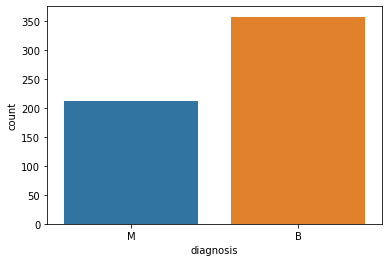

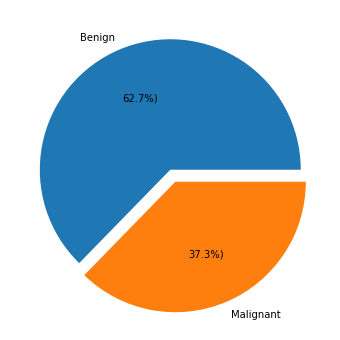

In [6]:
sns.countplot(x='diagnosis', data = df, label = 'count')
percentage_values = df['diagnosis'].value_counts(normalize = True).mul(100).round(1)


def func(pct):
    return "{:.1f}%)".format(pct)

fig = plt.figure(figsize =(10, 6))
plt.pie(percentage_values, labels=['Benign', 'Malignant'], explode=(0,0.1), autopct = lambda percentage_values: func(percentage_values.tolist()))
plt.show()

As we can observe, there are about 60% points for one class and 40% for the other class, this dataset can be said to be slightly unbalanced but, it should not cause any significant performance degradation.

In [7]:
# List of Numerical features
numerical_features = [feature for feature in df.columns if df[feature].dtype !='O']
print('Number of numerical features : ',len(numerical_features))

Number of numerical features :  31


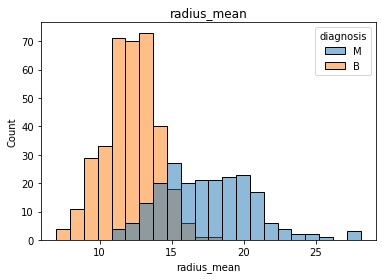

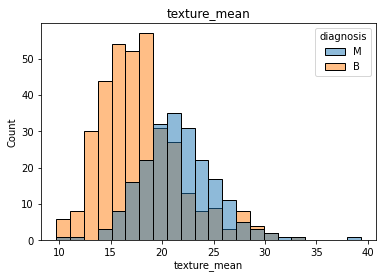

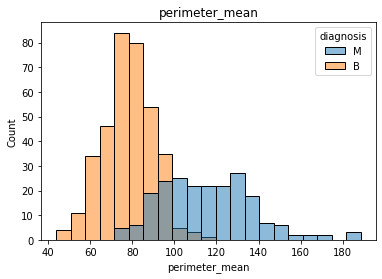

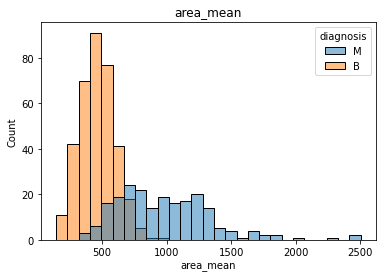

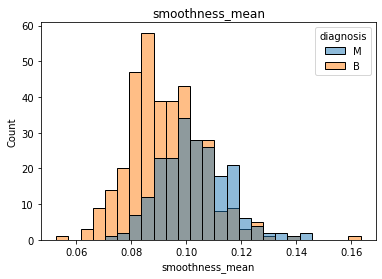

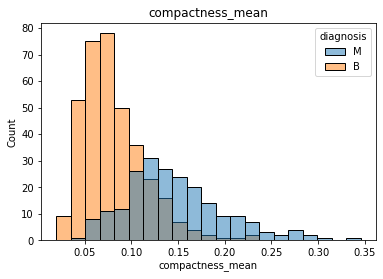

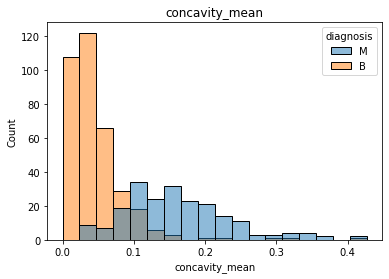

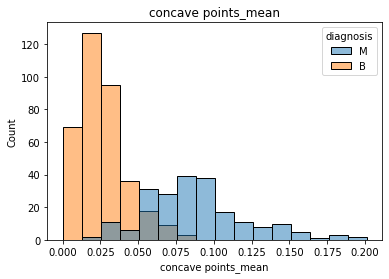

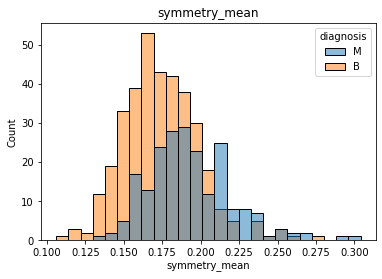

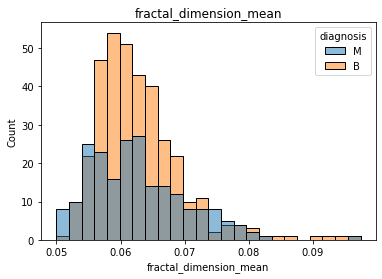

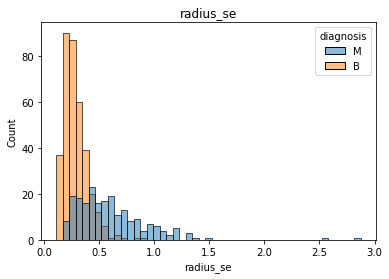

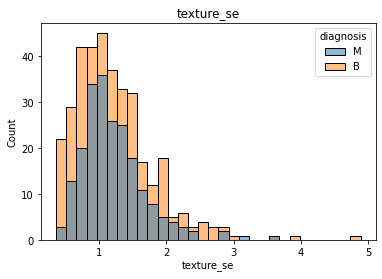

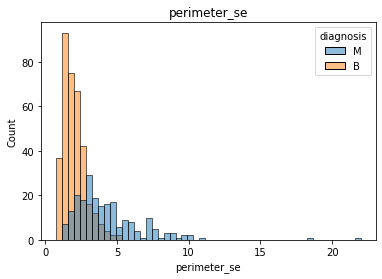

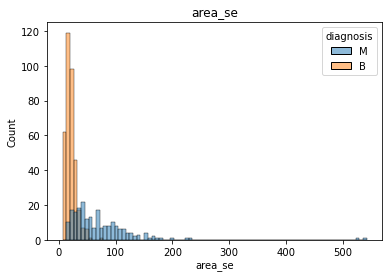

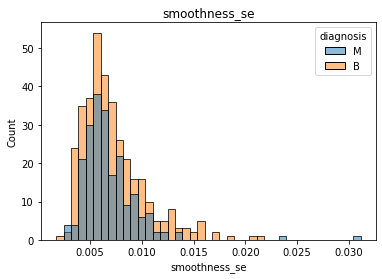

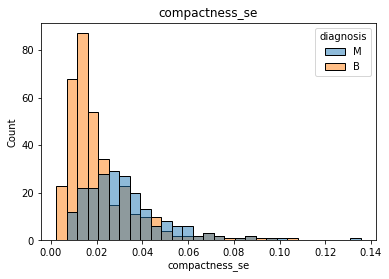

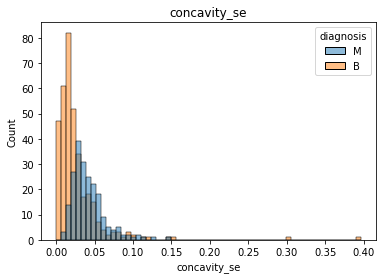

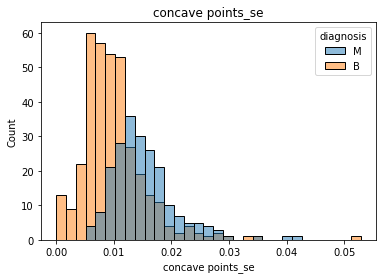

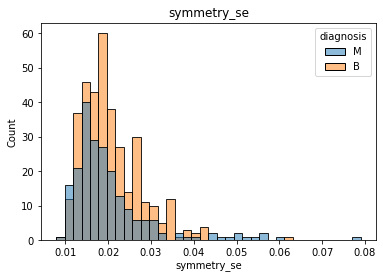

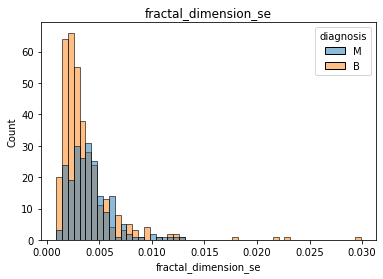

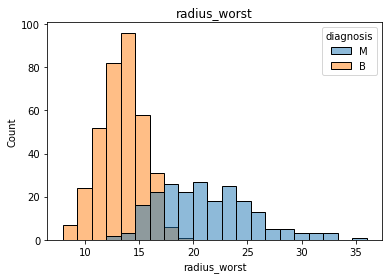

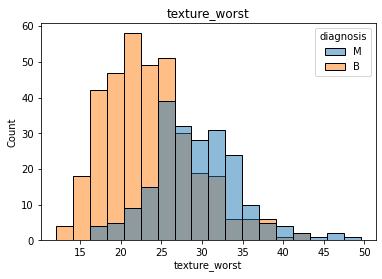

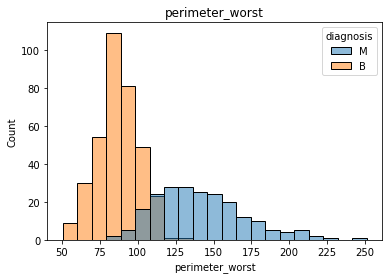

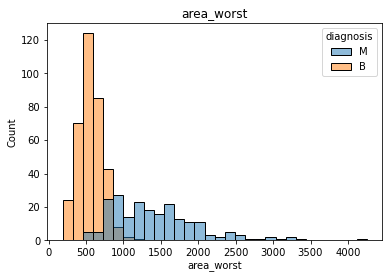

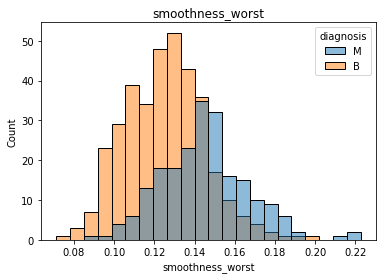

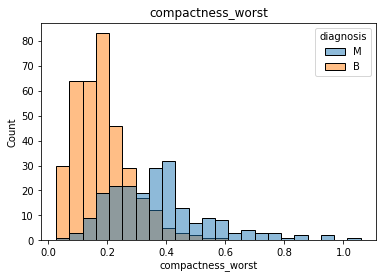

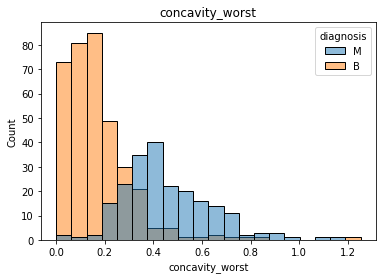

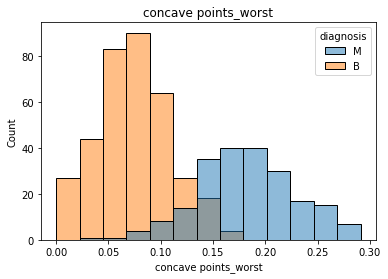

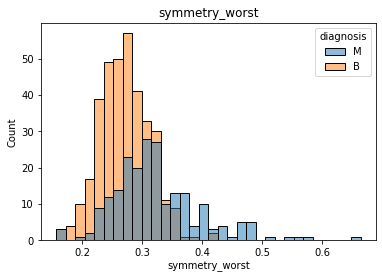

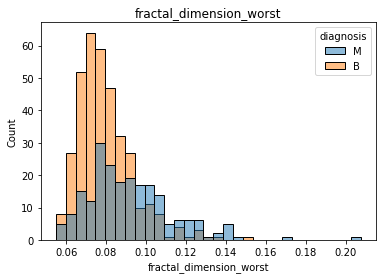

In [8]:
## Analysing the continuous values by creating histograms to understand the distribution

for feature in numerical_features[1:]:
    data=df.copy()
    sns.histplot(data=data, x=feature ,hue="diagnosis")
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

we can observe that most of the features are normally distributed. Also, we can observe that there is some separation in
data distribution for the two classes for many features which might be good for classification. Although some features, for example- smoothness se, texture se etc, have almost the same data distribution for the two classes. 
Now, let's check for the outliers present in the dataset. For this we will use the Box Plot.

C:\Users\PrashantRay\anaconda3\envs\envpytorch\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


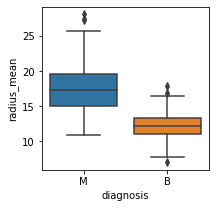

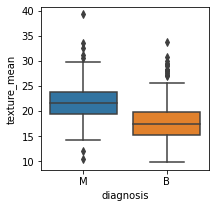

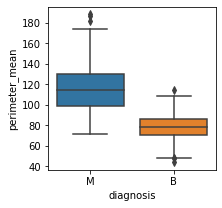

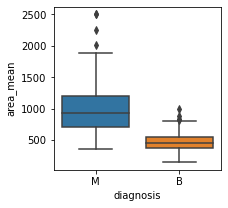

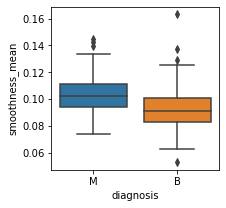

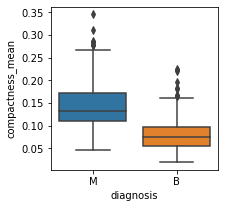

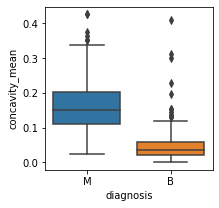

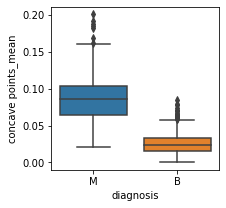

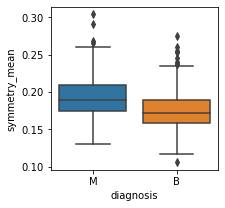

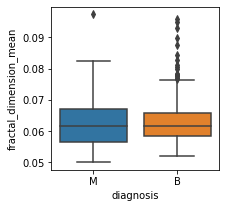

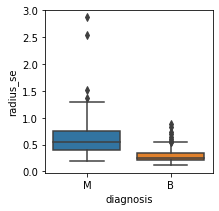

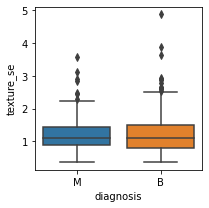

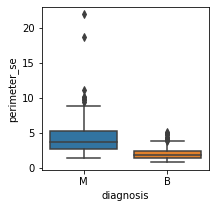

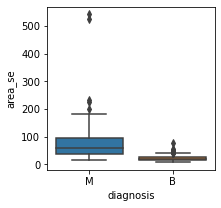

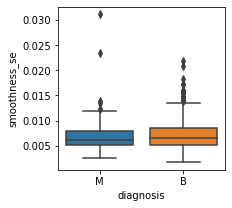

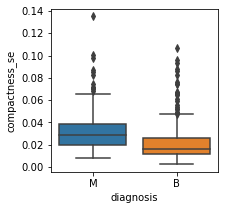

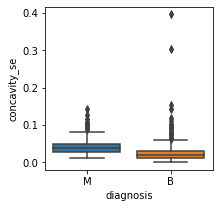

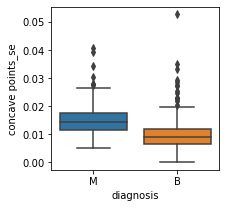

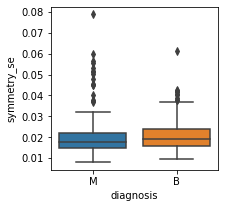

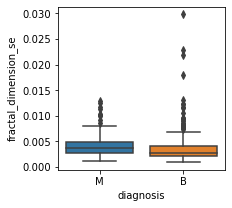

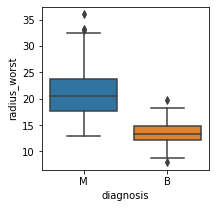

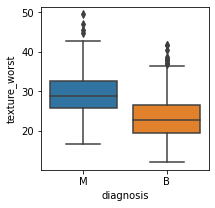

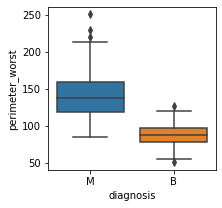

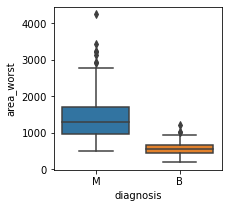

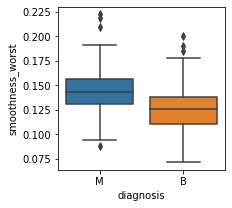

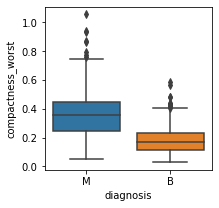

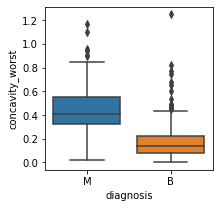

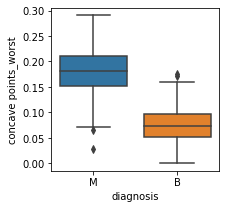

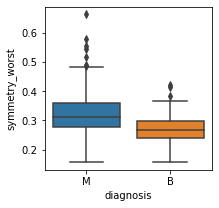

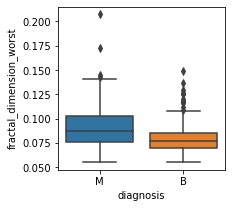

In [9]:
for feature in numerical_features[1:]:
    fig = plt.figure(figsize = (3,3))
    sns.boxplot(x = 'diagnosis', y = feature, data =df )
   

We can see many outliers here but, in the paper 'Nuclear feature extraction for breast tumor diagnosis' the authors mention that "the features are numerically modeled such that larger values will typically indicate a higher likelihood of malignancy". So the outliers are important, that is why we are not going to remove the outliers in this case. Let's also analyse how the input features are correlated with each other.

<AxesSubplot:>

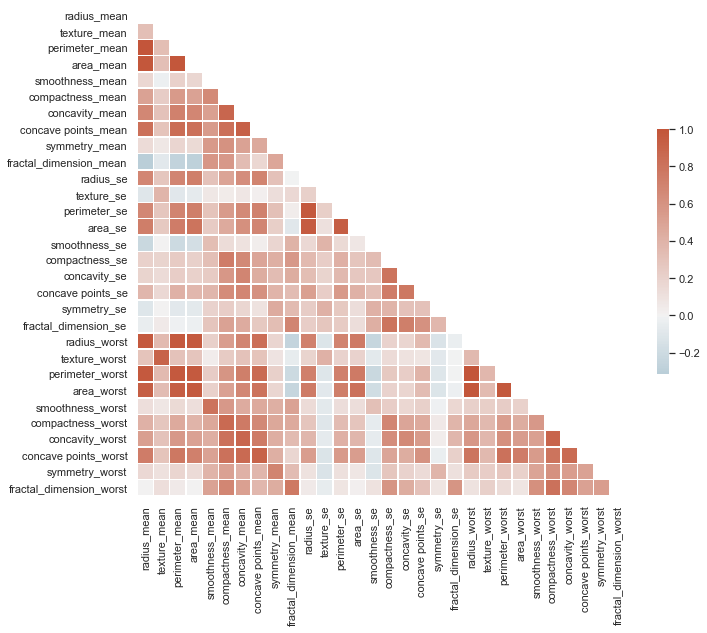

In [10]:
X = df.drop(['diagnosis', 'id'], axis = 1)
Y = df.diagnosis

# Compute the correlation matrix
sns.set_theme(style="white")

corr = X.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

## 3. Model Training And Testing

In [11]:
# Encoding categorical features
labelEncoder = LabelEncoder()
df['diagnosis'] = labelEncoder.fit_transform(df.diagnosis)
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [12]:
# Prepare Train and Test datasets
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.3,random_state=92)

### 3.1 Decision Tree

In [13]:
dtree = DecisionTreeClassifier()
dtree.fit(x_train,y_train)
acc = dtree.score(x_test,y_test)
print('Decision Tree model accuracy before finetuning : {}'.format(acc))

Decision Tree model accuracy before finetuning : 0.9005847953216374


In [14]:
#Hyperparameter Tuning :  DecisionTree
parameters = {'criterion':('gini','entropy'),
              'min_samples_split':[2,3,4,5,6,7,8],
              'max_depth':[1,2,3,4,6,8,10,15,20],
              'class_weight':('balanced', None)
}

grid_search = GridSearchCV(dtree, parameters, cv=5)
grid_search.fit(x_train,y_train)
DTree_model = grid_search.best_estimator_
grid_search.best_params_

{'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': 8,
 'min_samples_split': 5}

In [15]:
acc = DTree_model.score(x_test, y_test)
print('Decision Tree model accuracy after finetuning hyperparameters : {}'.format(acc))
dot_data = export_graphviz(DTree_model, out_file=None,feature_names=X.columns)
graph = graphviz.Source(dot_data,format='png')
out = graph.render(filename='decisionTree')

Decision Tree model accuracy after finetuning hyperparameters : 0.9298245614035088


              precision    recall  f1-score   support

           B       0.96      0.94      0.95       114
           M       0.88      0.91      0.90        57

    accuracy                           0.93       171
   macro avg       0.92      0.93      0.92       171
weighted avg       0.93      0.93      0.93       171



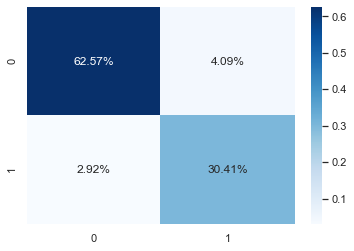

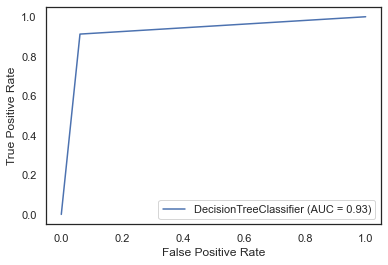

In [16]:
y_pred = DTree_model.predict(x_test)

# classification report
cr = classification_report(y_test, y_pred)
print(cr)

# Confusion Matrix 
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%', cmap='Blues')

#Plot of ROC Curve 
metrics.plot_roc_curve(DTree_model, x_test, y_test)
plt.show()

### 3.2 Random Forest

In [17]:
rf_classifier = RandomForestClassifier()
rf_classifier.fit(x_train, y_train)
acc = rf_classifier.score(x_test,y_test)
print('Random Forest model accuracy before finetuning : {}'.format(acc))

Random Forest model accuracy before finetuning : 0.9590643274853801


In [18]:
param = {"n_estimators": np.arange(10,150,10),
              "min_samples_split": np.arange(2,100,2),
              "criterion": ["gini", "entropy"],
              "max_depth" :np.arange(10,120,10),
              "max_features":['auto', 'sqrt'],
              "bootstrap":[True,False]
              }
grid_RF = RandomizedSearchCV(rf_classifier, param_distributions = param, scoring = 'accuracy', cv = 10)
grid_RF.fit(x_train, y_train)
rf_model = grid_RF.best_estimator_
grid_RF.best_params_

{'n_estimators': 120,
 'min_samples_split': 2,
 'max_features': 'sqrt',
 'max_depth': 90,
 'criterion': 'entropy',
 'bootstrap': False}

Random Forest model accuracy after finetuning hyperparameters : 0.9532163742690059
              precision    recall  f1-score   support

           B       0.96      0.97      0.97       114
           M       0.95      0.91      0.93        57

    accuracy                           0.95       171
   macro avg       0.95      0.94      0.95       171
weighted avg       0.95      0.95      0.95       171



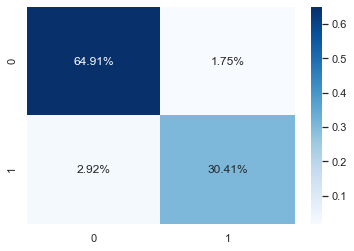

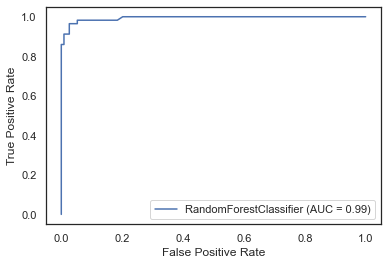

In [19]:
rf_accuracy = rf_model.score(x_test,y_test)
print('Random Forest model accuracy after finetuning hyperparameters : {}'.format(rf_accuracy))
y_pred = rf_model.predict(x_test)

# classification report
cr = classification_report(y_test, y_pred)
print(cr)

# Confusion Matrix 
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%', cmap='Blues')

#Plot of ROC Curve 
metrics.plot_roc_curve(rf_model, x_test, y_test)
plt.show()

### 3.3 Principle Component Analysis (PCA)

Principal component analysis (PCA) is a technique for reducing the dimensionality of datasets but at the same time minimizing
information loss.Also, it makes the data uncorrelated. Before applying PCA algorithm, it is important to scale the data.

In [20]:
std_scaler = StandardScaler()
std_scaled_xtrain = std_scaler.fit_transform(x_train)
std_scaled_xtest = std_scaler.transform(x_test)
std_scaled_xtest

array([[-0.79347986, -0.96278869, -0.81046121, ..., -0.50692724,
        -0.38129051, -0.92230703],
       [-0.79919295, -2.04901949, -0.79880606, ..., -0.43498354,
         0.15720235,  0.00995439],
       [-0.12219253, -0.86771379, -0.17317467, ..., -1.27770999,
        -1.67525717, -0.89844369],
       ...,
       [-0.73349248, -0.26398814, -0.72263138, ...,  0.04593475,
        -0.17539618,  0.31434463],
       [ 1.96593958,  1.69455492,  2.08833922, ...,  2.56097916,
         1.87087668,  2.2992448 ],
       [ 2.11447975,  0.67487656,  2.15910259, ...,  1.84303473,
         1.44325   ,  0.83032322]])

Text(0, 0.5, 'cumulative explained variance')

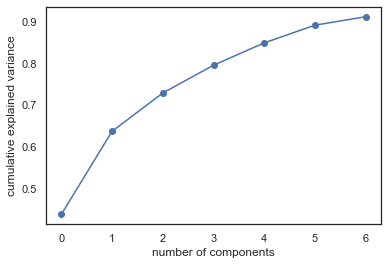

In [21]:
pca = PCA(n_components=0.90)
x_train_pca = pca.fit_transform(std_scaled_xtrain)
x_test_pca = pca.transform(std_scaled_xtest)
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'bo-')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

We can select 7 components which will cover around 90% of variance.

[0.43932369 0.19824438 0.09127184 0.06625233 0.05334563 0.04218223
 0.02023187]


Text(0, 0.5, 'Explained variance')

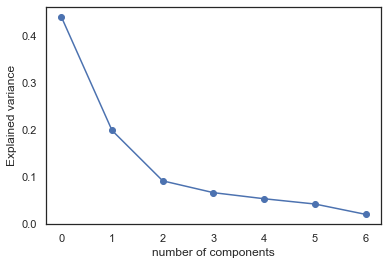

In [22]:
explained_var = pca.explained_variance_ratio_
print(explained_var)
plt.plot(pca.explained_variance_ratio_, 'bo-')
plt.xlabel('number of components')
plt.ylabel('Explained variance')

### 3.4 KNN

Text(0, 0.5, 'Error Rate')

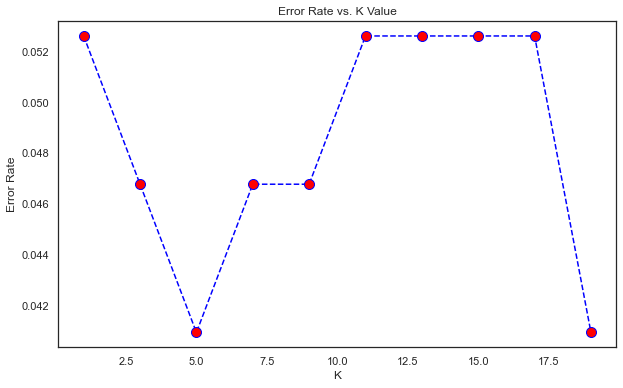

In [23]:
error_rate = []
for i in range(1,20,2):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(x_train_pca,y_train)
 pred_i = knn.predict(x_test_pca)
 error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,20,2),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

As we can observe, we get minimum error rate at K=5. Therefore the optimal value of K for the model is K=5.

KNN model accuracy : 0.9532163742690059
              precision    recall  f1-score   support

           B       0.95      0.98      0.97       114
           M       0.96      0.89      0.93        57

    accuracy                           0.95       171
   macro avg       0.96      0.94      0.95       171
weighted avg       0.95      0.95      0.95       171



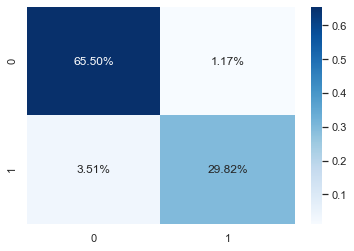

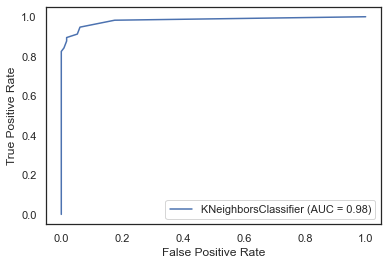

In [24]:
model_KNN = KNeighborsClassifier(n_neighbors=9)
model_KNN.fit(x_train_pca, y_train)
y_pred = model_KNN.predict(x_test_pca)
print('KNN model accuracy : {}'.format(accuracy_score(y_pred,y_test)))

# classification report
cr = classification_report(y_test, y_pred)
print(cr)

# Confusion Matrix 
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%', cmap='Blues')

#Plot of ROC Curve 
metrics.plot_roc_curve(model_KNN, x_test_pca, y_test)
plt.show()

### 3.5 Linear Regression

In [25]:
lreg_classifier = LogisticRegression()
lreg_classifier.fit(x_train_pca,y_train)
y_pred = lreg_classifier.predict(x_test_pca)
print('Linear Regression model accuracy before fine-tuning: {}'.format(accuracy_score(y_test,y_pred)))

Linear Regression model accuracy before fine-tuning: 0.9766081871345029


In [27]:
param = {
    'C': [0.001, 0.1, 1, 10, 20]
}
grid_Logistic = GridSearchCV(lreg_classifier, param_grid = param, scoring = 'accuracy', cv = 10)
grid_Logistic.fit(x_train_pca,y_train)
print(grid_Logistic.best_params_)
model_LR = grid_Logistic.best_estimator_

{'C': 10}


LR model Accuracy: 0.9874371859296482
              precision    recall  f1-score   support

           B       0.97      0.99      0.98       114
           M       0.98      0.93      0.95        57

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



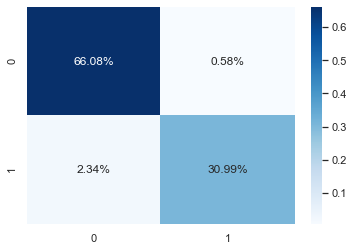

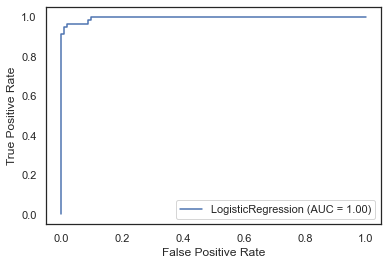

In [29]:
model_LR.fit(x_train_pca,y_train)
print('LR model Accuracy:', model_LR.score(x_train_pca, y_train))
y_pred = model_LR.predict(x_test_pca)

# classification report
cr = classification_report(y_test, y_pred)
print(cr)

# Confusion Matrix 
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%', cmap='Blues')

#Plot of ROC Curve 
metrics.plot_roc_curve(model_LR, x_test_pca, y_test)
plt.show()

### 3.6 SVM

In [30]:
model_svm = SVC()
model_svm.fit(x_train_pca,y_train)
model_svm.score(x_test_pca,y_test)

0.9766081871345029

In [31]:
param_grid = {'C': [0.1, 1, 10, 100],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf','linear']}
 
grid = GridSearchCV(model_svm, param_grid, cv=5)
grid.fit(x_train_pca,y_train)
print(grid.best_params_)
model_svm = grid.best_estimator_

{'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}


SVM model Accuracy: 0.9748743718592965
              precision    recall  f1-score   support

           B       0.97      1.00      0.99       114
           M       1.00      0.95      0.97        57

    accuracy                           0.98       171
   macro avg       0.99      0.97      0.98       171
weighted avg       0.98      0.98      0.98       171



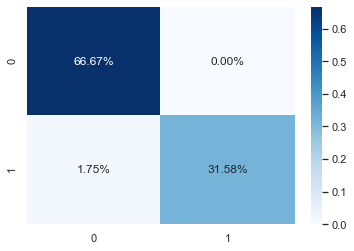

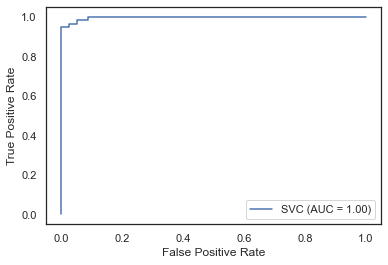

In [32]:
model_svm.fit(x_train_pca,y_train)
print('SVM model Accuracy:', model_svm.score(x_train_pca, y_train))
y_pred = model_svm.predict(x_test_pca)
# classification report
cr = classification_report(y_test, y_pred)
print(cr)

# Confusion Matrix 
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%', cmap='Blues')

#Plot of ROC Curve 
metrics.plot_roc_curve(model_svm, x_test_pca, y_test)
plt.show()

### 4. Conclusion

I have used a variety of algorithms for the classification of tumors (malignant or benign). Among all the algorithms, the Logistic Regression and
Support Vector Classifier gave maximum accuracies and minimum misclassifications for the positive class.